# Wearable Data Affective State Classifier

This notebook is divided into 3 parts:

- Data Visualization
- Model Creation
- Model optimization

# Data Visualization

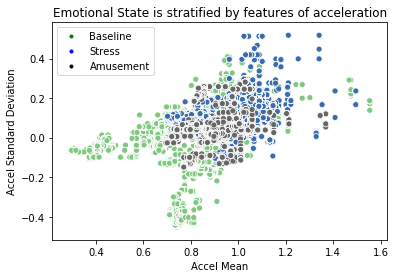

In [76]:
# Now let's visualize the accelerometer mean colored by the affective state label 
g = sns.scatterplot(x='a_mean',y='a_std',hue='label', data=df_AllData, palette='Accent')

## This scatterplot shows that plotting the accelerometer mean (over all directions), against the accelerometer standard deviation (over all directions) shows a natural separation of the different affective states.

# Model Creation

In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import tensorflow as tf

import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
from keras.layers import LSTM
from keras.utils import to_categorical
from keras.optimizers import SGD

# Create feature matrix to feed into the LSTM model
X = df_AllData.drop('label', axis =1).values
y = to_categorical(df_AllData['label'])

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

# Separate the data into a 75% train / 25% test split.
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.25, random_state=42)


# Reshape the input variables to fit the expected input shape
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# There will be 15 neurons in the LSTM network, one for each input.
num_neurons = 15
num_features = 15

print('Building the LSTM network...')

# Create the model instance and define the network structure
model = Sequential()
model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=True))
model.add(LSTM(num_neurons, input_shape=(1, num_features), return_sequences=False))
model.add(Dense(3, activation='sigmoid'))

# Let's look at a summary of the model
model.summary()

# Define the optimizer and compile model
opt = SGD(lr=0.05)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

print('Training LSTM...')

batch_size = 5 # I think I want to use batch_size = 1

# Now fit the model to the training data
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(X_test, y_test))

# Model optimization

In [46]:
# Evaluate the fitted moel using the accuracy metric
scores, accu = model.evaluate(X_test, y_test, batch_size=batch_size)

print('score:', scores)
print('accuracy:', accu)

30454/30454 [==============================] - 3s 98us/step
score: 0.030836466451110742
accuracy: 0.9889676570892334


##  Model accuracy ~ 99%

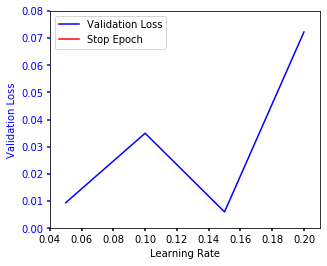

In [79]:
p1, = host.plot(lr_to_test, score, "b-", label="Validation Loss")

## Optimal Learning Rate is 0.05 -- lowest Validation Loss